In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [23]:
im = Image.open('../datasets/train/house/im_000007.png')

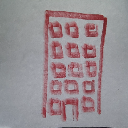

In [24]:
im

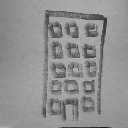

In [25]:
bw = im.convert('L')
bw

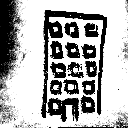

In [26]:
enhancer = ImageEnhance.Contrast(bw)
contrasted = enhancer.enhance(30)
contrasted


In [27]:
N = 115

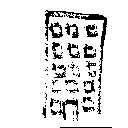

In [28]:
ar = np.array(bw)
filtered_ar = ar >= N
Image.fromarray(filtered_ar)

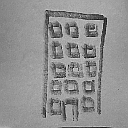

In [29]:
sharper = bw.filter(ImageFilter.SHARPEN)
sharper

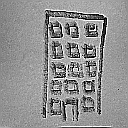

In [30]:
enhanced_edges = bw.filter(ImageFilter.EDGE_ENHANCE)
enhanced_edges

In [31]:
np.array(bw).mean()

144.42828369140625

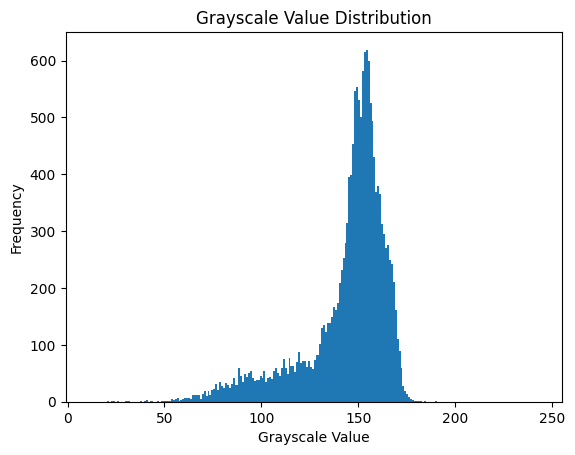

In [32]:
hist, bins = np.histogram(np.array(bw), bins=257, range=(-1, 255))

# Plot the histogram
plt.bar(bins[:-1], hist, width=1)
plt.xlim(min(bins), max(bins))
plt.title('Grayscale Value Distribution')
plt.xlabel('Grayscale Value')
plt.ylabel('Frequency')
plt.show()

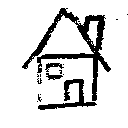

In [17]:
thresholded = bw.point(lambda x: 255 if x > 125 else 0)
thresholded

In [18]:
hist

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   0,   1,   2,   1,   2,   2,   2,   2,   0,   5,   1,   4,
         4,   3,   5,   9,   7,   4,   8,  10,   5,  13,   3,   9,  17,
         9,  17,  17,  19,  19,  17,  17,  29,   8,  21,  18,  23,  21,
        32,  19,  27,  24,  30,  28,  33,  41,  35,  32,  31,  30,  33,
        47,  48,  44,  39,  35,  46,  33,  39,  46,  49,  42,  58,  47,
        50,  38,  49,  39,  49,  31,  42,  56,  47,  33,  26,  42,  43,
        36,  30,  44,  35,  40,  30,  44,  46,  48,  32,  42,  24,  35,
        37,  40,  53,  56,  64,  74,  96,  96, 101,  89, 107, 117, 149,
       175, 181, 198, 229, 271, 302, 374, 381, 377, 384, 358, 405, 468,
       563, 516, 512, 466, 448, 383, 384, 410, 395, 376, 363, 350, 293,
       352, 378, 368, 384, 355, 321, 296, 255, 237, 147, 104,  6

In [19]:
hist2, bins2 = np.histogram(np.array(bw), bins=25, range=(-1, 255))

In [20]:
hist2

array([   0,    0,    2,    2,   22,   68,  144,  222,  388,  431,  448,
        359,  457, 1068, 3055, 4555, 3935, 1193,   35,    0,    0,    0,
          0,    0,    0])

In [21]:
np.median(bw)

156.0

In [22]:
# Find the peaks
peaks, _ = find_peaks(hist, width=3, distance=20, height=15)

# Get the peak values
peak_values = hist[peaks]

# Sort the peaks by their values in descending order
sorted_peaks = peaks[np.argsort(peak_values)][::-1]

# Get the positions of the two highest peaks
first_peak_position = sorted_peaks[0]
second_peak_position = sorted_peaks[1]

first_peak_position, second_peak_position
peaks

array([102, 125, 156])

In [146]:
def final_test(image_path):
   im = Image.open(image_path) 
   bw = im.convert('L')

   hist, _ = np.histogram(np.array(bw), bins=257, range=(-1, 255))
   peaks, _ = find_peaks(hist, height=15, width=3, distance=20)
   
   threshold = np.mean(peaks)
   return bw.point(lambda x: 255 if x > threshold else 0)

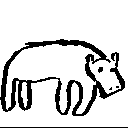

In [159]:
final_test("../datasets/train/animal/im_000005.png")

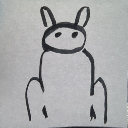